## Perform clustering using k-means algorithm & compare clusters with actual Iris dataset flower species.

Load iris dataset

In [1]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

X = iris.data
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names

Apply k-means using k=3

In [2]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=99)

In [3]:
model.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,99
,copy_x,True
,algorithm,'lloyd'


Print cluster centroid & label counts

In [4]:
import pandas as pd

cluster_labels = [f"Cluster {i}" for i in range(model.n_clusters)]

centroids_df = pd.DataFrame(
    model.cluster_centers_, columns=feature_names, index=cluster_labels
)
centroids_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Cluster 0,6.850000,3.073684,5.742105,2.071053
Cluster 1,5.006000,3.428000,1.462000,0.246000
Cluster 2,5.901613,2.748387,4.393548,1.433871


In [5]:
from collections import Counter

label_counts = Counter(model.labels_)

pd.DataFrame(sorted(label_counts.values()), columns=["Count"], index=cluster_labels)

,Count
Cluster 0,38
Cluster 1,50
Cluster 2,62


Visualize clusters in 2D using PCA.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

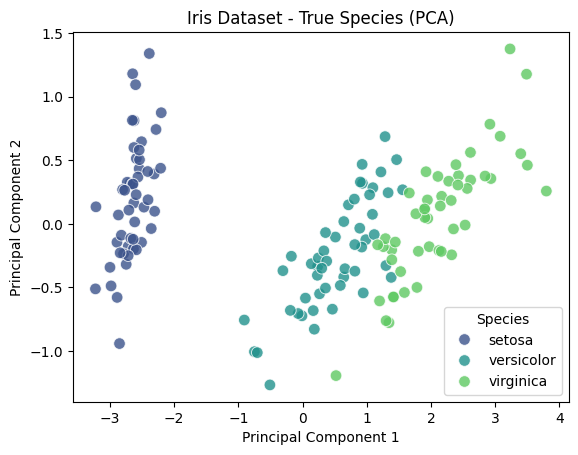

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=target_names[y],
    palette='viridis',
    s=70,
    alpha=0.8
)
plt.title('Iris Dataset - True Species (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Species')
plt.show()

In [8]:
centroids_pca = pca.transform(model.cluster_centers_)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


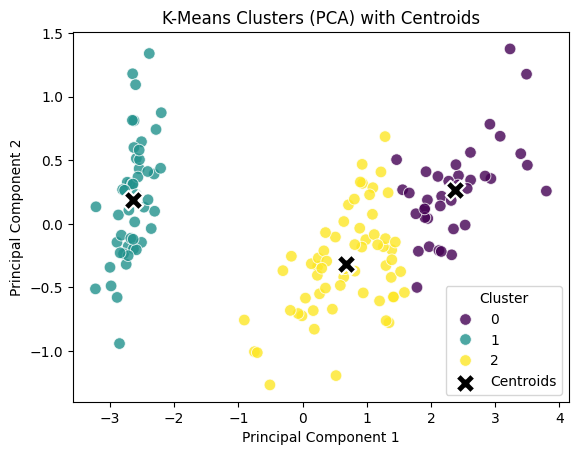

In [9]:
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=model.labels_,
    palette='viridis',
    s=70,
    alpha=0.8
)
# Plot centroids
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    marker='X',
    s=200,
    color='black',
    label='Centroids',
    edgecolor='white',
    linewidth=1.5
)
plt.title('K-Means Clusters (PCA) with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

Compare predicted cluster with actual species using a confusion matrix

In [10]:
y_pred = model.predict(X)

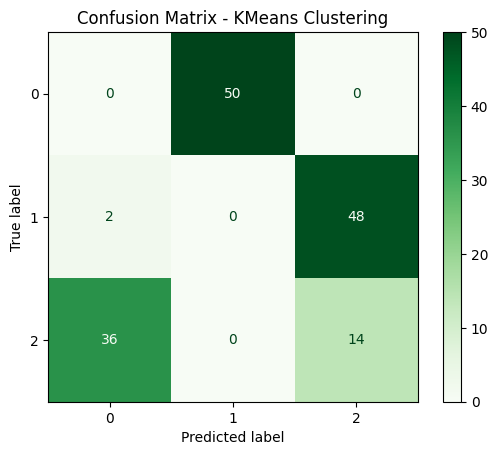

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap="Greens")
plt.title("Confusion Matrix - KMeans Clustering")
plt.show()

## Study how the presence of outliers affect centroid position

Perform k-means before & after adding the outliers

In [12]:
import numpy as np

outliers = np.array([
    [5.0, 3.5, 1.3, 0.3],
    [4.8, 3.1, 15.6, 0.2],
    [6.3, 4.8, 5.0, 1.9],
    [5.1, 3.7, 15.6, 0.4],
    [5.5, 4.8, 3.7, 1.0],
])

print(f"Original data shape: {X.shape}")
X_with_outliers = np.concatenate([X, outliers])
print(f"New data shape (with outliers): {X_with_outliers.shape}")

Original data shape: (150, 4)
New data shape (with outliers): (155, 4)


In [13]:
model1 = KMeans(n_clusters=3, random_state=99)
model1.fit(X_with_outliers)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,99
,copy_x,True
,algorithm,'lloyd'


Compare the centroid position & inertia value. Visualise how centroids shift due to outliers.

In [14]:
centroids_df_outliers = pd.DataFrame(
    model1.cluster_centers_,
    columns=feature_names,
    index=[f"Cluster {i}" for i in range(model1.n_clusters)]
)
centroids_df_outliers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Cluster 0,6.292929,2.925253,4.946465,1.690909
Cluster 1,5.005556,3.372222,1.555556,0.290741
Cluster 2,4.950000,3.400000,15.600000,0.300000


In [15]:
centroids_df_outliers - centroids_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Cluster 0,-0.557071,-0.148432,-0.795641,-0.380144
Cluster 1,-0.000444,-0.055778,0.093556,0.044741
Cluster 2,-0.951613,0.651613,11.206452,-1.133871


In [16]:
model.inertia_ - model1.inertia_

-83.72892894422442

In [17]:
def get_sorted_centroids(centers):
    sums = centers.sum(axis=1)
    indices = np.argsort(sums)
    return centers[indices]

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


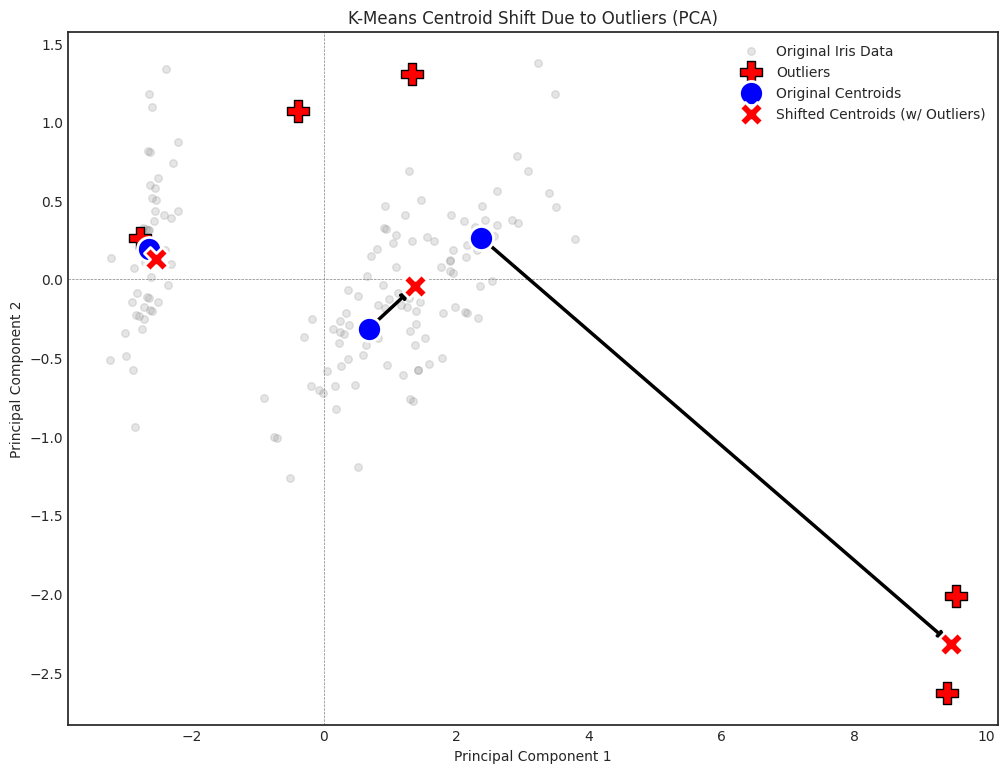

In [19]:
outliers_pca = pca.transform(outliers)

sorted_orig_centroids = get_sorted_centroids(model.cluster_centers_)
sorted_outlier_centroids = get_sorted_centroids(model1.cluster_centers_)

centroids_pca_orig = pca.transform(sorted_orig_centroids)
centroids_pca_outlier = pca.transform(sorted_outlier_centroids)

plt.figure(figsize=(12, 9))
plt.style.use('seaborn-v0_8-white')

plt.scatter(X_pca[:, 0], X_pca[:, 1], s=30, alpha=0.2, 
            label='Original Iris Data', color='gray')

plt.scatter(outliers_pca[:, 0], outliers_pca[:, 1],
            s=250, marker='P', color='red', edgecolor='black',
            label='Outliers', zorder=10) # zorder=10 puts them on top

# Plot the original centroids
plt.scatter(centroids_pca_orig[:, 0], centroids_pca_orig[:, 1],
            s=300, marker='o', color='blue', edgecolor='white',
            linewidth=2, label='Original Centroids', zorder=10)

# Plot the new, shifted centroids
plt.scatter(centroids_pca_outlier[:, 0], centroids_pca_outlier[:, 1],
            s=300, marker='X', color='red', edgecolor='white',
            linewidth=2, label='Shifted Centroids (w/ Outliers)', zorder=10)

for i in range(len(centroids_pca_orig)):
    orig_point = centroids_pca_orig[i]
    new_point = centroids_pca_outlier[i]

    plt.annotate(
        text='',
        xy=new_point,
        xytext=orig_point,
        arrowprops=dict(
            arrowstyle='->', 
            color='black',
            linewidth=2.5,
            shrinkA=5,
            shrinkB=5
        ),
        zorder=5
    )

plt.title('K-Means Centroid Shift Due to Outliers (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='upper right')
plt.axhline(0, color='grey', linestyle='--', linewidth=0.5)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.5)
plt.show()